In [1]:
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
import neural as nn
import pandas as pd

In [2]:
train_dataset = pd.read_csv("mnist_train.csv")
test_dataset = pd.read_csv("mnist_test.csv")

In [3]:
def split_to_labels_and_data(pd_dataset):
    numpy_mat = pd_dataset.to_numpy(dtype=float)
    labels = numpy_mat[:, 0]
    data = numpy_mat[:, 1:]
    return data, labels

In [4]:
x_train, y_train = split_to_labels_and_data(train_dataset)
x_test, y_test = split_to_labels_and_data(test_dataset)

In [5]:
def merge_datasets(x_train, y_train, x_test, y_test):
    data = np.vstack((x_train, x_test))
    labels = np.concatenate((y_train, y_test))
    
    return data, labels

In [6]:
data, labels = merge_datasets(x_train, y_train, x_test, y_test)

In [7]:
def shuffle_dataset(data, labels):
    random_idx = np.random.permutation(data.shape[0])
    
    new_data = data[random_idx]
    new_labels = labels[random_idx]
    
    return new_data, new_labels

In [8]:
data, labels = shuffle_dataset(data, labels)

In [9]:
def split_train_val_test(data, labels, train_split=0.7, val_split=0.15, test_split=0.15):
    train_num = int(data.shape[0] * train_split)
    val_num = int(data.shape[0] * val_split)
    
    x_train = data[:train_num]
    y_train = labels[:train_num]
    
    x_val = data[train_num:(train_num+val_num)]
    y_val = labels[train_num:(train_num+val_num)]
    
    x_test = data[(train_num+val_num):]
    y_test = labels[(train_num+val_num):]
    
    return x_train, y_train, x_val, y_val, x_test, y_test

In [10]:
x_train, y_train, x_val, y_val, x_test, y_test = split_train_val_test(data, labels)

In [11]:
print(f"Training Data: {x_train.shape[0]}")
print(f"Validation Data: {x_val.shape[0]}")
print(f"Test Data: {x_test.shape[0]}")

Training Data: 49000
Validation Data: 10500
Test Data: 10500


In [12]:
y_train = nn.preprocessing.to_one_hot(y_train)
y_val = nn.preprocessing.to_one_hot(y_val)
y_test = nn.preprocessing.to_one_hot(y_test)

In [13]:
x_train /= 255.0
x_val /= 255.0
x_test /= 255.0

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [35]:
model = nn.Sequential([
    nn.layers.Conv2D(4, 3, kernel_initializer="he_normal"),
    nn.layers.Activation("relu"),
    nn.layers.Dropout(0.1),
    nn.layers.MaxPooling2D(),
    nn.layers.Conv2D(8, 3, kernel_initializer="he_normal"),
    nn.layers.Activation("relu"),
    nn.layers.Dropout(0.1),
    nn.layers.MaxPooling2D(filter_size=3, strides=2),
    nn.layers.Flatten(),
    nn.layers.FullyConnected(neurons=500, kernel_initializer="he_normal"),
    nn.layers.Activation("relu"),    
    nn.layers.FullyConnected(neurons=10),
])

In [36]:
model.set(
    loss=nn.losses.OneHotCrossEntropy(from_logits=True),
    optimizer=nn.optimizers.Adam(),
    metrics=["one_hot_acc"]
)

In [37]:
history = model.train(x_train, y_train, batch_size=128, epochs=20)

Epoch 1/20:  350/383: oooooooooooooooooooooooooooooooooooooooooooooooooooooo......	loss: 0.29485	one_hot_acc: 0.91127

KeyboardInterrupt: 

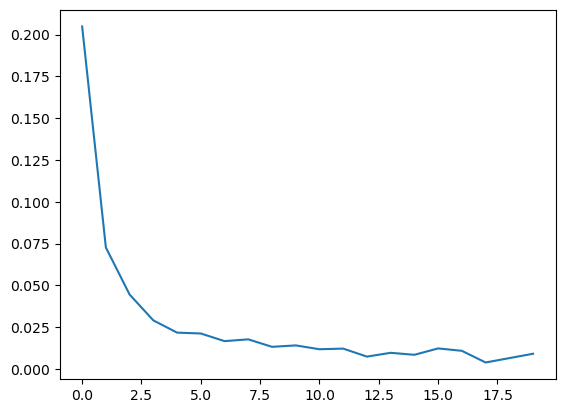

In [28]:
plt.plot(history["loss"])

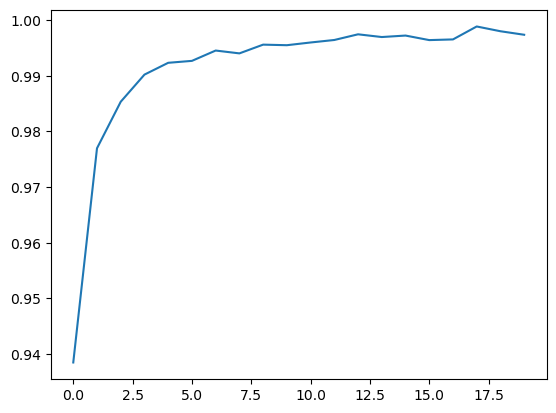

In [29]:
plt.plot(history["one_hot_acc"])

In [30]:
model.evaluate(x_val, y_val)

329/329: oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo


{'loss': 0.11884993216293092, 'one_hot_acc': 0.979047619047619}

In [ ]:
weights = []
for lyr in model.layers:
    if lyr.get_base() == nn.layers.StdLayer:
        weights.append(lyr.get_weights())
weights

In [31]:
model.evaluate(x_test, y_test)

329/329: oooooooooooooooooooooooooooooooooooooooooooooooooooooooooooo


{'loss': 0.11025746531297428, 'one_hot_acc': 0.9822857142857143}